So far we've learnt the most basic but crucial algorithms a data scientist and a machine learning engineer must know. We've learnt the techniques for classification and regression, and we've done some very rudementary data exploration. Hopefully, you've also done the assignments and the mini projects in the courses we recommended you to do. In this assignment, we give you a very easy dataset on which you can perform both classification and regression tasks. The purpose of this assignment is for you to try your hand out at all the techniques you've learnt so far and work on a real dataset to figure out whether what you learnt up until now works.

## Link to the Dataset

https://archive.ics.uci.edu/ml/datasets/wine+quality

For you to submit this assingment, you'll have to give us the accuracy you're getting on your classification, what algorithms/techniques you used for classification and why. Also, you'll give us the minimum loss you got in your regression, what algorithms/techniques you used and why. Just as last assignment, you'll clone the original folder, work completely on this Jupyter notebook and submit all your work. Also, you'll include in a text cell the above things. Happy playing on this dataset!


## Some things that must be present in the notebook
- Read the dataset and display various details of data (correlation,some statistics etc..)
- Split the data into train test split
- Show some vizualizations
- Models for both classification and regression.
- Show the results clearly and all of them must be on the test set

This [book](https://github.com/dvrg/educate-resource-for-machine-learning/blob/master/6.%20Machine%20Learning%20Mastery%20With%20Python%20Understand%20Your%20Data%2C%20Create%20Accurate%20Models%20and%20work%20Projects%20End-to-End.pdf) is a great resource for data science/predictive modelling in general and can be used as reference book for this task and future. The book highlights all the necessary steps one must take to understand data and build powerful models in a simple and understandable manner. 

### Accuracy on your classification task and the reason you used this algorithm/technique -> 
                for red wine accuracy was 100%
                for white wine accuracy was 100%

### Minimum loss on you regression task and the reason you used this algorithm/technique ->
                for red wine accuracy was 99.34%
                for white wine accuracy was 99.89%

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [93]:
names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
dt = pd.read_csv(r'winequality-red.csv', names = names, delimiter = ';')
dt = dt.drop([0], axis = 0)
dt.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
9,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
10,7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


In [94]:
print(dt.shape)

(1599, 12)


In [95]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
fixed_acidity           1599 non-null object
volatile_acidity        1599 non-null object
citric_acid             1599 non-null object
residual_sugar          1599 non-null object
chlorides               1599 non-null object
free_sulfur_dioxide     1599 non-null object
total_sulfur_dioxide    1599 non-null object
density                 1599 non-null object
pH                      1599 non-null object
sulphates               1599 non-null object
alcohol                 1599 non-null object
quality                 1599 non-null object
dtypes: object(12)
memory usage: 87.4+ KB


In [96]:
dt.quality = pd.to_numeric(dt.quality, errors = 'coerce').astype('float64')
dt.fixed_acidity = pd.to_numeric(dt.fixed_acidity, errors = 'coerce').astype('float64')

In [97]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null object
citric_acid             1599 non-null object
residual_sugar          1599 non-null object
chlorides               1599 non-null object
free_sulfur_dioxide     1599 non-null object
total_sulfur_dioxide    1599 non-null object
density                 1599 non-null object
pH                      1599 non-null object
sulphates               1599 non-null object
alcohol                 1599 non-null object
quality                 1599 non-null float64
dtypes: float64(2), object(10)
memory usage: 99.9+ KB


In [98]:
dt.describe()

,fixed_acidity,quality
count,1599.000000,1599.000000
mean,8.319637,5.636023
std,1.741096,0.807569
min,4.600000,3.000000
25%,7.100000,5.000000
50%,7.900000,6.000000
75%,9.200000,6.000000
max,15.900000,8.000000


In [99]:
dt.quality.value_counts().sort_index()

3.0     10
4.0     53
5.0    681
6.0    638
7.0    199
8.0     18
Name: quality, dtype: int64

In [100]:
corr = dt.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed_acidity,quality
fixed_acidity,1,0.124052
quality,0.124052,1


<function matplotlib.pyplot.show(*args, **kw)>

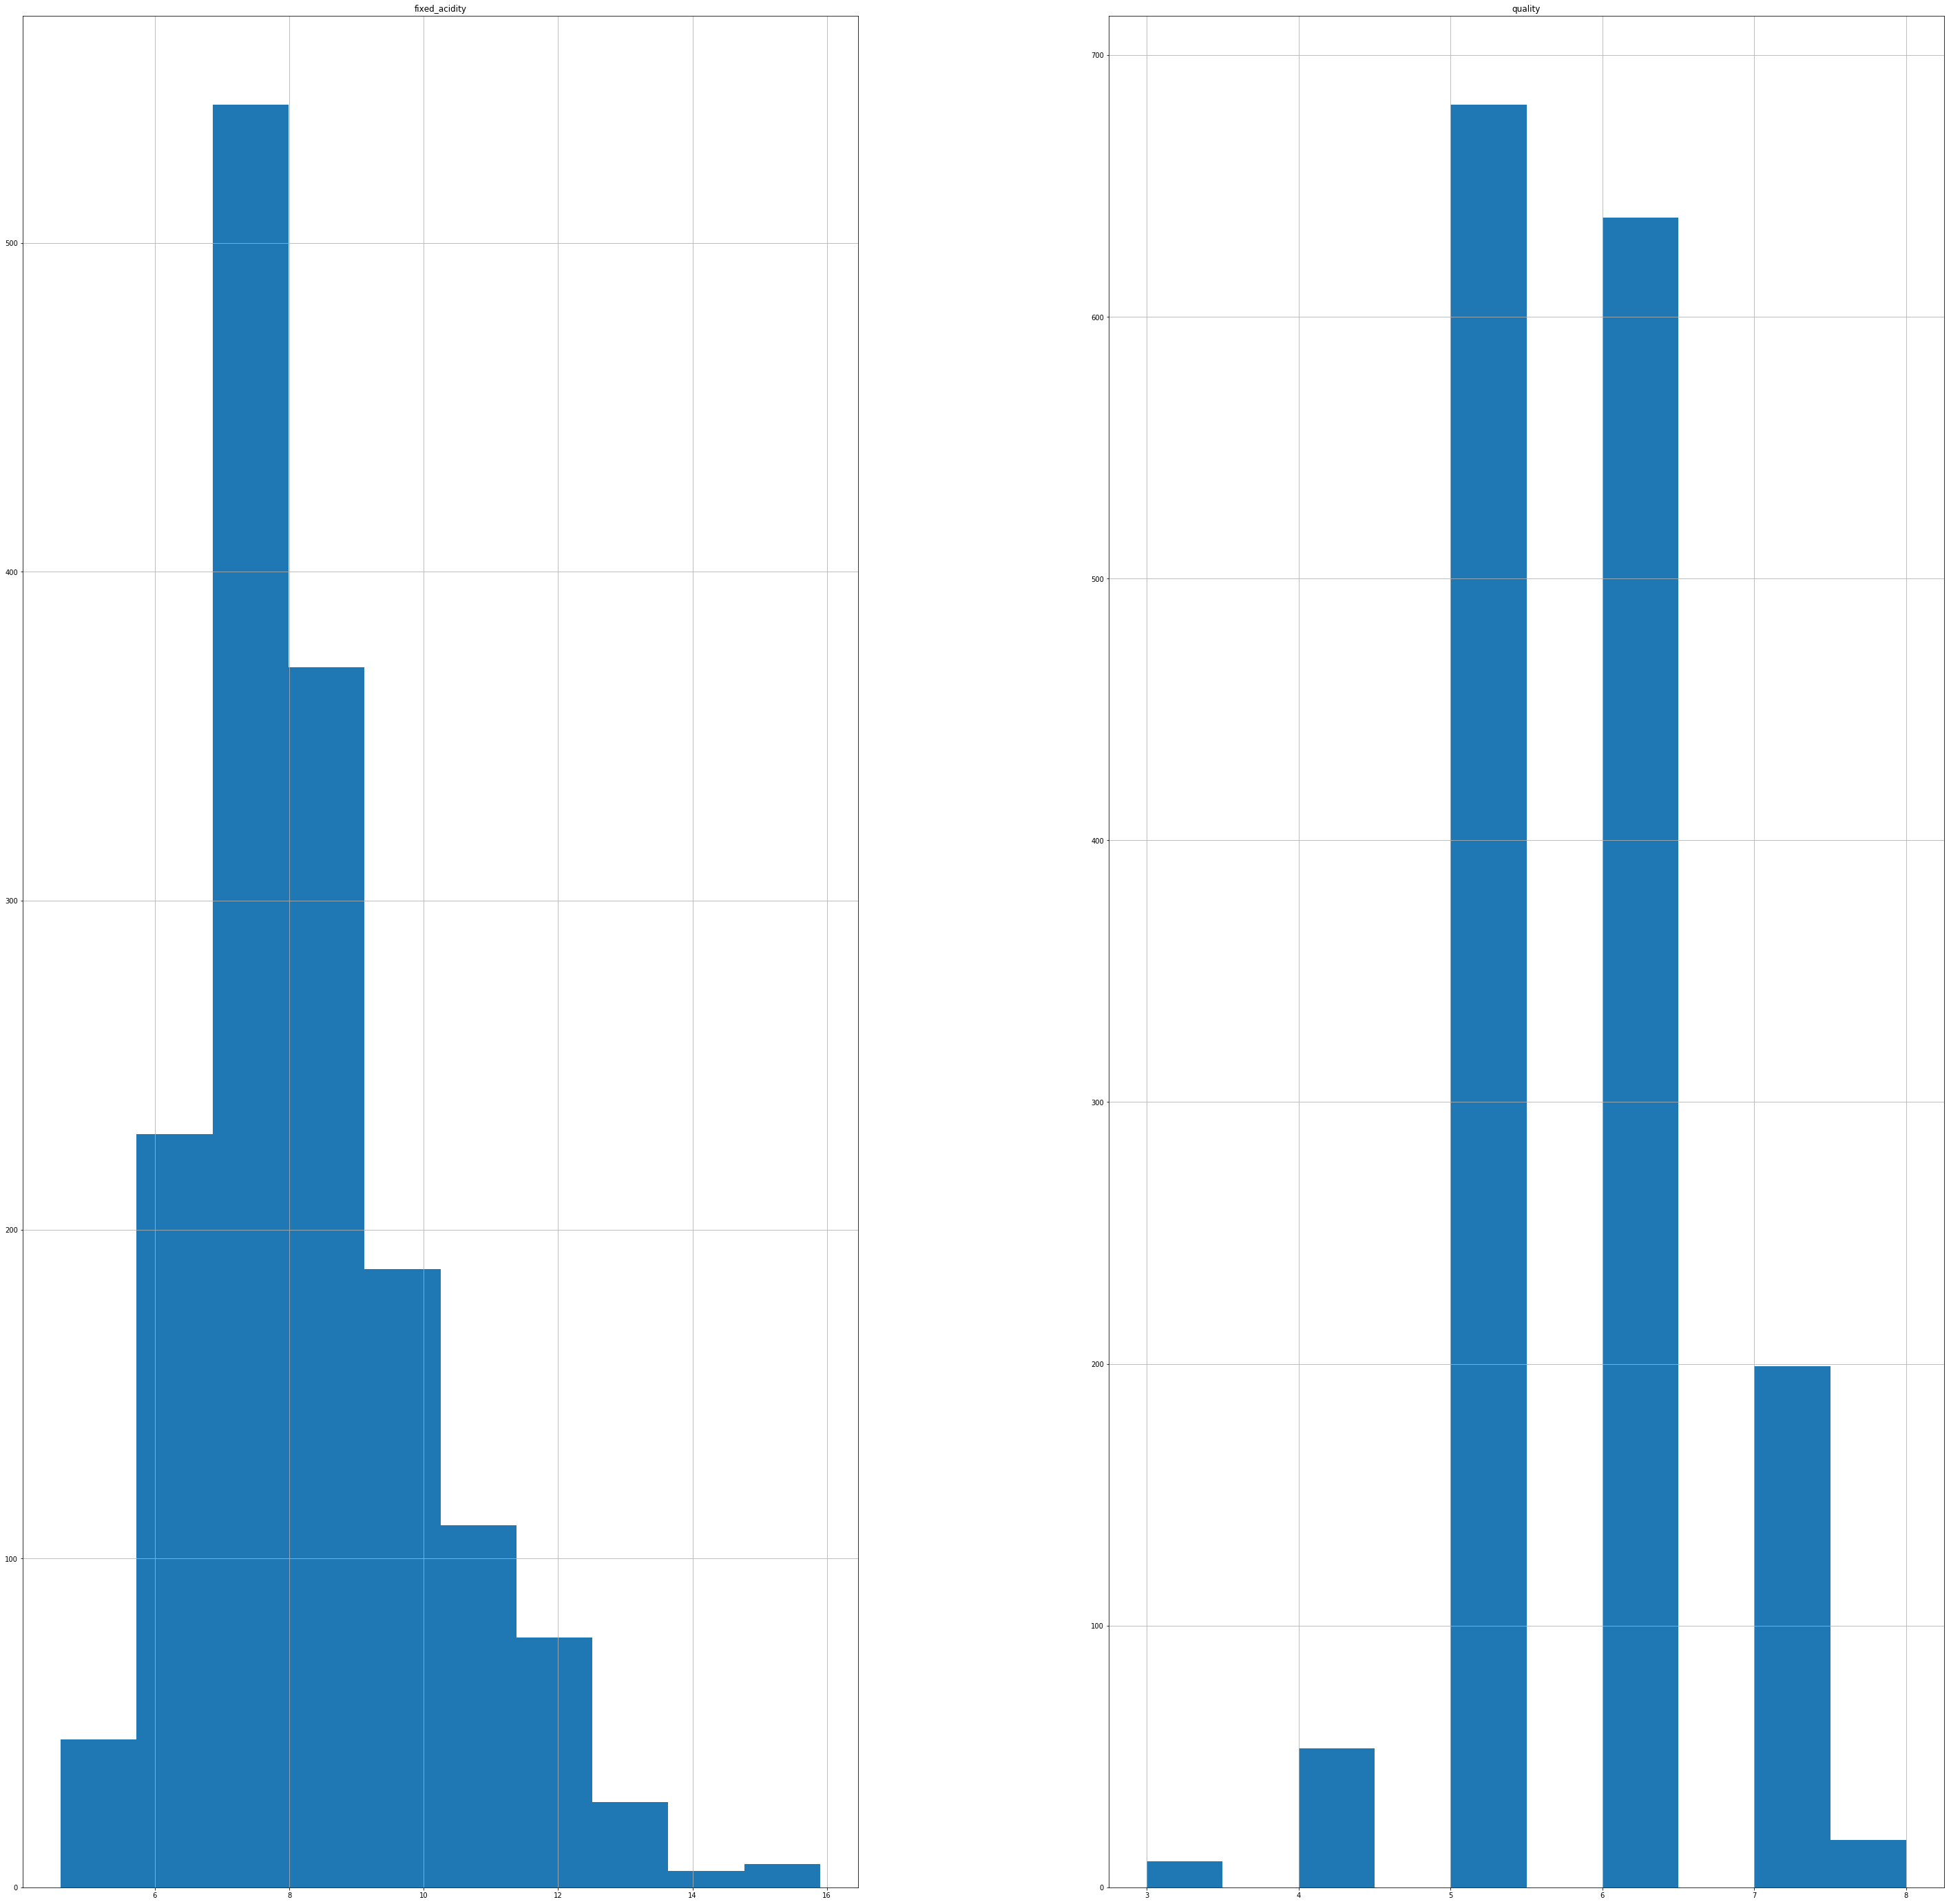

In [101]:
dt.hist()
plt.show

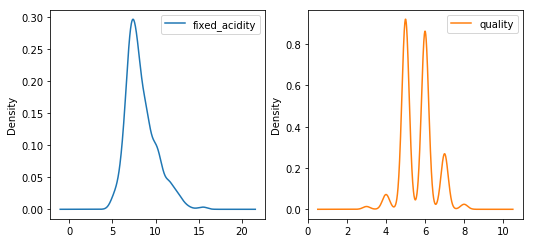

In [102]:
dt.plot(kind='density', subplots=True, layout=(11,11), sharex=False)
plt.show()

In [103]:
skew = dt.skew()
print(skew)

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


In [104]:
def binary(quality):
    if quality >= 6:
        return 1
    else:
        return 0

In [105]:
dt['binary'] = dt['quality'].apply(binary)

In [106]:
X = dt.drop('quality', axis=1)
X = dt.drop('binary', axis=1)
Y = dt.binary
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [107]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.997656 (0.003580)
LDA: 0.999219 (0.002344)
KNN: 0.746672 (0.025528)
CART: 1.000000 (0.000000)
NB: 0.967169 (0.011987)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

SVM: 0.874102 (0.026121)


In [108]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[133   0]
 [  0 187]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       187

   micro avg       1.00      1.00      1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [109]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.99375
[[133   0]
 [  2 185]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       133
           1       1.00      0.99      0.99       187

   micro avg       0.99      0.99      0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
dt = pd.read_csv(r'winequality-white.csv', names = names, delimiter = ';')
dt = dt.drop([0], axis = 0)
dt.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
6,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
7,6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
8,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
9,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
10,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6


In [71]:
print(dt.shape)

(4898, 12)


In [72]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 1 to 4898
Data columns (total 12 columns):
fixed_acidity           4898 non-null object
volatile_acidity        4898 non-null object
citric_acid             4898 non-null object
residual_sugar          4898 non-null object
chlorides               4898 non-null object
free_sulfur_dioxide     4898 non-null object
total_sulfur_dioxide    4898 non-null object
density                 4898 non-null object
pH                      4898 non-null object
sulphates               4898 non-null object
alcohol                 4898 non-null object
quality                 4898 non-null object
dtypes: object(12)
memory usage: 267.9+ KB


In [79]:
dt.fixed_acidity = pd.to_numeric(dt.fixed_acidity, errors = 'coerce').astype('float64')
dt.volatile_acidity = pd.to_numeric(dt.volatile_acidity, errors = 'coerce').astype('float64')
dt.citric_acid = pd.to_numeric(dt.citric_acid, errors = 'coerce').astype('float64')
dt.residual_sugar = pd.to_numeric(dt.residual_sugar, errors = 'coerce').astype('float64')
dt.chlorides = pd.to_numeric(dt.chlorides, errors = 'coerce').astype('float64')
dt.free_sulfur_dioxide = pd.to_numeric(dt.free_sulfur_dioxide, errors = 'coerce').astype('float64')
dt.total_sulfur_dioxide = pd.to_numeric(dt.total_sulfur_dioxide, errors = 'coerce').astype('float64')
dt.density = pd.to_numeric(dt.density, errors = 'coerce').astype('float64')
dt.pH = pd.to_numeric(dt.pH, errors = 'coerce').astype('float64')
dt.sulphates = pd.to_numeric(dt.sulphates, errors = 'coerce').astype('float64')
dt.alcohol = pd.to_numeric(dt.alcohol, errors = 'coerce').astype('float64')
dt.quality = pd.to_numeric(dt.quality, errors = 'coerce').astype('float64')

In [80]:
dt.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [81]:
dt.quality.value_counts().sort_index()

3.0      20
4.0     163
5.0    1457
6.0    2198
7.0     880
8.0     175
9.0       5
Name: quality, dtype: int64

In [82]:
corr = dt.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1,-0.0226973,0.289181,0.0890207,0.0230856,-0.0493959,0.0910698,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.0226973,1,-0.149472,0.0642861,0.0705116,-0.0970119,0.0892605,0.0271138,-0.0319154,-0.0357281,0.0677179,-0.194723
citric_acid,0.289181,-0.149472,1,0.0942116,0.114364,0.0940772,0.121131,0.149503,-0.163748,0.0623309,-0.0757287,-0.00920909
residual_sugar,0.0890207,0.0642861,0.0942116,1,0.0886845,0.299098,0.401439,0.838966,-0.194133,-0.0266644,-0.450631,-0.0975768
chlorides,0.0230856,0.0705116,0.114364,0.0886845,1,0.101392,0.19891,0.257211,-0.0904395,0.0167629,-0.360189,-0.209934
free_sulfur_dioxide,-0.0493959,-0.0970119,0.0940772,0.299098,0.101392,1,0.615501,0.29421,-0.000617796,0.0592172,-0.250104,0.00815807
total_sulfur_dioxide,0.0910698,0.0892605,0.121131,0.401439,0.19891,0.615501,1,0.529881,0.00232097,0.134562,-0.448892,-0.174737
density,0.265331,0.0271138,0.149503,0.838966,0.257211,0.29421,0.529881,1,-0.0935915,0.0744931,-0.780138,-0.307123
pH,-0.425858,-0.0319154,-0.163748,-0.194133,-0.0904395,-0.000617796,0.00232097,-0.0935915,1,0.155951,0.121432,0.0994272
sulphates,-0.017143,-0.0357281,0.0623309,-0.0266644,0.0167629,0.0592172,0.134562,0.0744931,0.155951,1,-0.0174328,0.0536779


<function matplotlib.pyplot.show(*args, **kw)>

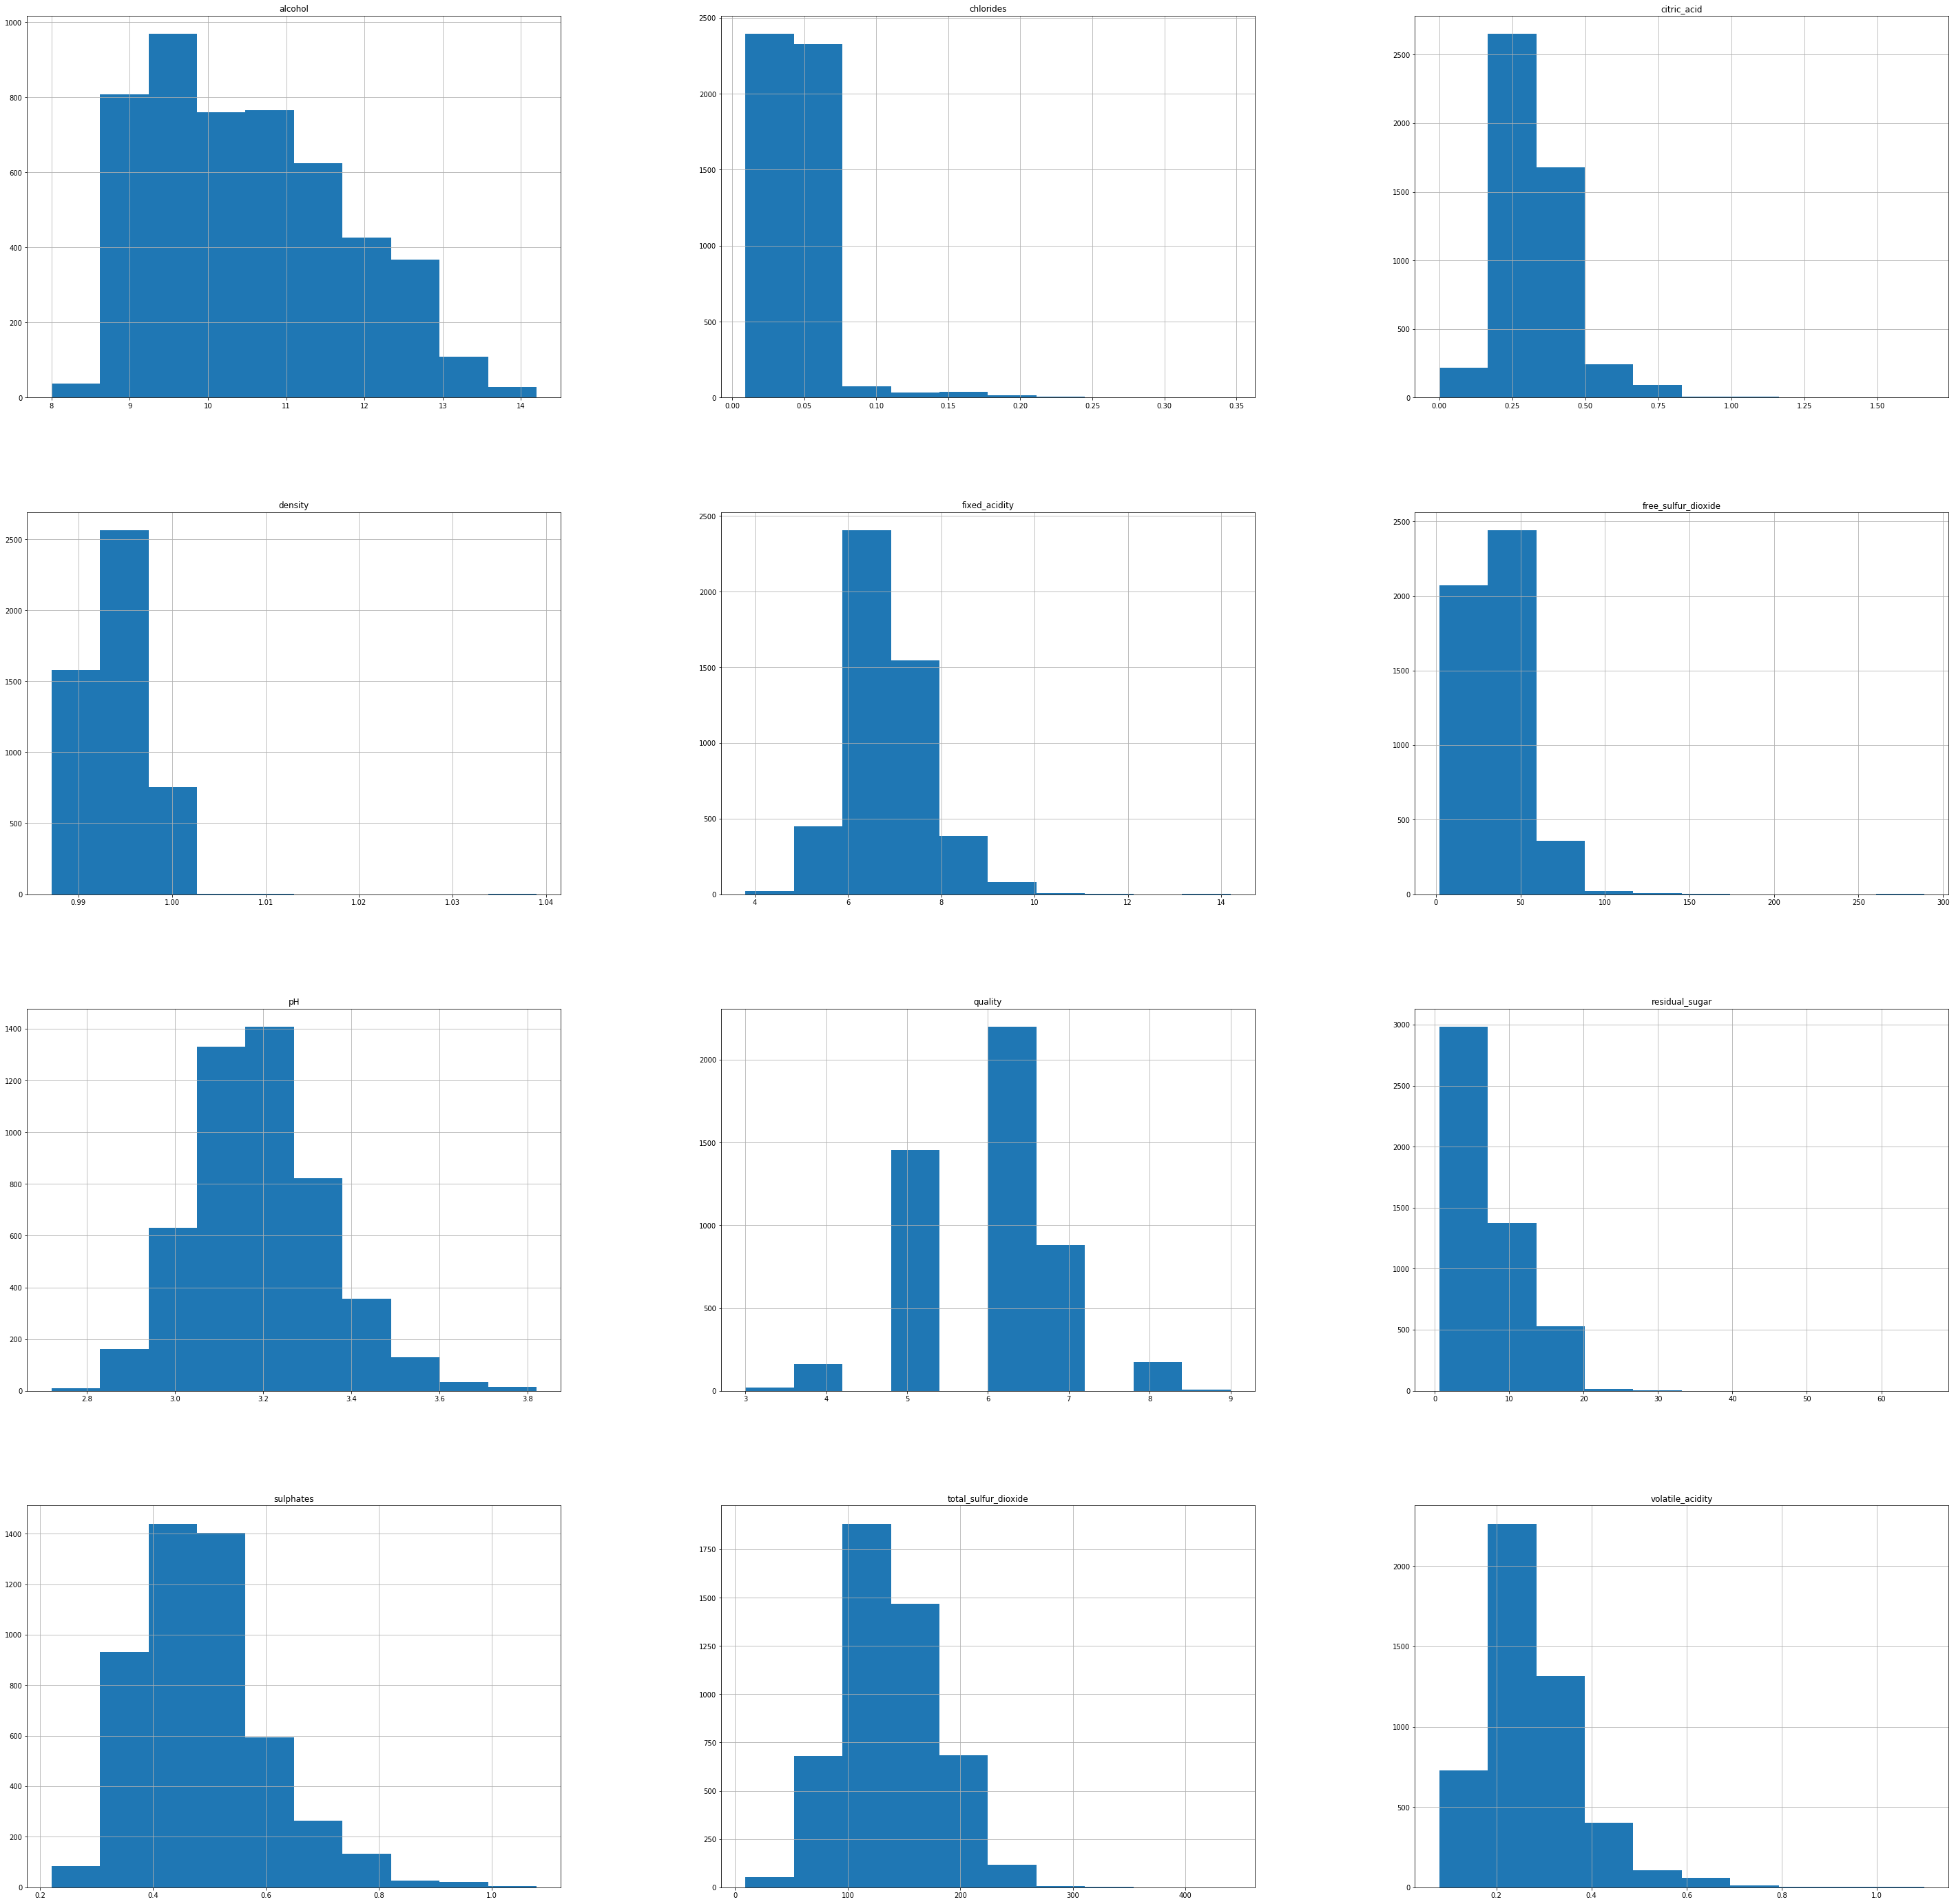

In [83]:
dt.hist()
plt.show

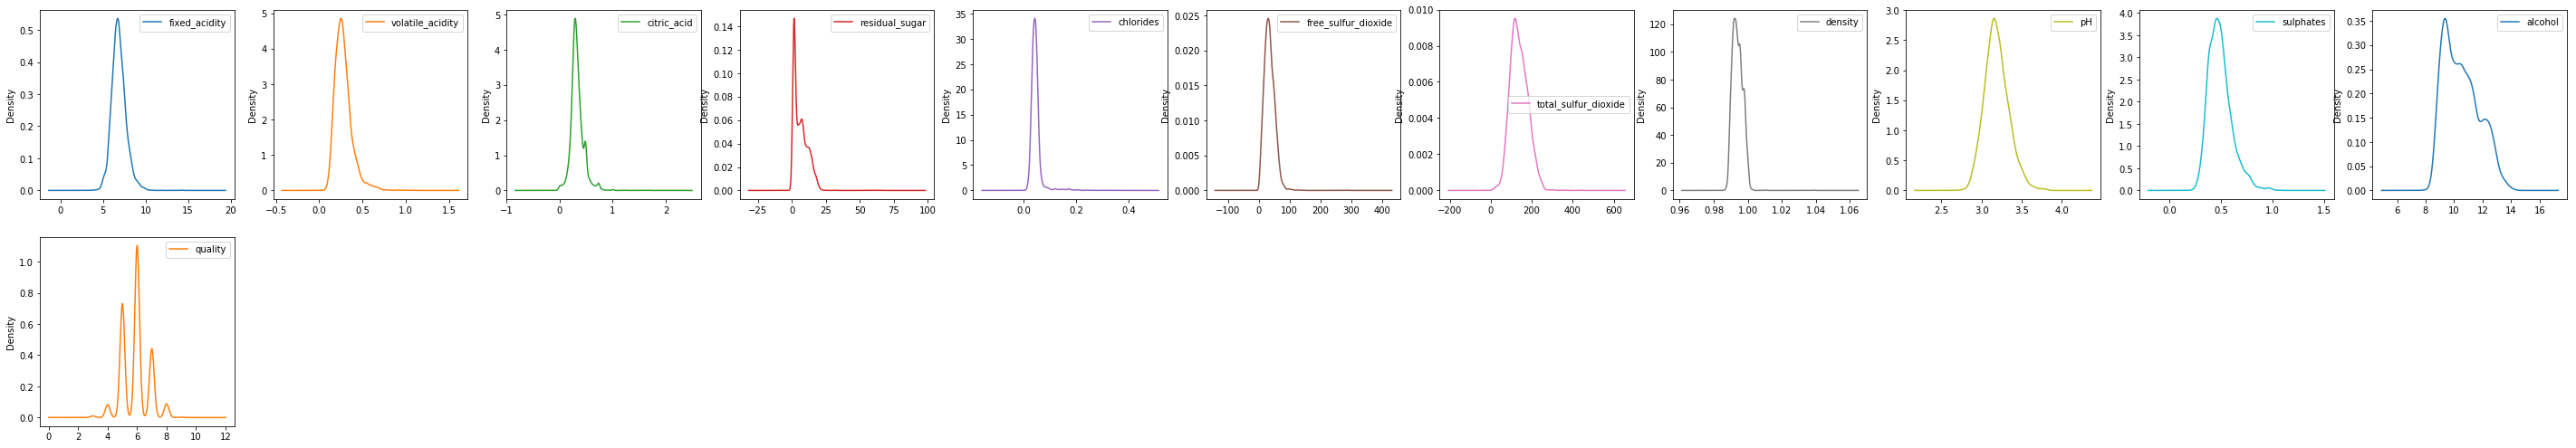

In [84]:
dt.plot(kind='density', subplots=True, layout=(11,11), sharex=False)
plt.show()

In [85]:
skew = dt.skew()
print(skew)

fixed_acidity           0.647751
volatile_acidity        1.576980
citric_acid             1.281920
residual_sugar          1.077094
chlorides               5.023331
free_sulfur_dioxide     1.406745
total_sulfur_dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64


In [86]:
def binary(quality):
    if quality >= 6:
        return 1
    else:
        return 0

In [87]:
dt['binary'] = dt['quality'].apply(binary)

In [88]:
X = dt.drop('quality', axis=1)
X = dt.drop('binary', axis=1)
Y = dt.binary
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [89]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.999490 (0.001020)
LDA: 1.000000 (0.000000)
KNN: 0.732502 (0.022993)
CART: 1.000000 (0.000000)
NB: 0.969373 (0.007819)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

SVM: 0.803205 (0.016500)


In [90]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[325   0]
 [  0 655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00       655

   micro avg       1.00      1.00      1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



In [91]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9989795918367347
[[325   0]
 [  1 654]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00       655

   micro avg       1.00      1.00      1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
